截距: 162.10460768891852
性别系数: 11.576192922668215
年龄系数: -0.33456347022900346
体重系数: 0.11240447197584968


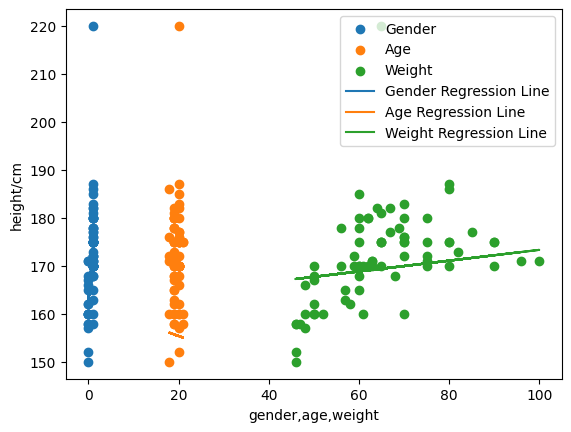

预测的身高: 163.50911021229817


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_excel('./请输入信息.xls')

data = data.drop(data.columns[0], axis=1)
data = data.dropna()
pattern = r'[a-zA-Z\u4e00-\u9fff-]'
mask = data.stack().astype(str).str.contains(pattern, na=False).unstack()
data = data[~mask]
median_values = data.median()
median_values = median_values.astype(int)
data = data.fillna(median_values)


X = data[["性别", "年龄", "体重kg"]].to_numpy()
X = X.astype(float)
X = X.astype(int)

y = data["身高cm"].to_numpy()
y = y.astype(float)
y = y.astype(int)
X = np.column_stack((np.ones(X.shape[0]), X))

coefficients = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
intercept, beta_gender, beta_age, beta_weight = coefficients

print("截距:", intercept)
print("性别系数:", beta_gender)
print("年龄系数:", beta_age)
print("体重系数:", beta_weight)

gender_column = X[:, 1]
age_column = X[:, 2]
weight_column = X[:, 3]
plt.scatter(gender_column, y, label="Gender")
plt.scatter(age_column, y, label="Age")
plt.scatter(weight_column, y, label="Weight")

plt.plot(gender_column,  intercept + beta_gender * gender_column, label="Gender Regression Line")
plt.plot(age_column, intercept + beta_age * age_column, label="Age Regression Line")
plt.plot(weight_column, intercept + beta_weight * weight_column, label="Weight Regression Line")
plt.xlabel("gender,age,weight")
plt.ylabel("height/cm")
plt.legend()
plt.show()

new_sample = [1, 0, 21, 75]
predicted_height = intercept + beta_gender * new_sample[1] + beta_age * new_sample[2] + beta_weight * new_sample[3]
print("预测的身高:", predicted_height)